# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
air_bnb = pd.read_csv(r'C:\Users\swapn\Downloads\AB_NYC_2019.csv')
pd.set_option('display.max.columns', 300)
pd.set_option('display.max.rows', 50)
df1 = air_bnb[['id', 
    'name', 'host_id', 'host_name', 
    'neighbourhood_group','neighbourhood', 
    'latitude', 'longitude', 
     'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]
air_bnb['last_review'] = pd.to_datetime(air_bnb.last_review)
air_bnb = air_bnb.dropna()
air_bnb.isna().sum()
air_bnb.dtypes
#air_bnb.head()

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

1. Which hosts are the busiest and why?

In [11]:
air_bnb_sorted = df1.sort_values(by=['host_name','calculated_host_listings_count'],ascending=False)
air_bnb_sorted

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
33137,26139678,Private cozy room in perfect UWS,18497228,현선,Manhattan,Morningside Heights,40.80485,-73.96534,Private room,1200,60,0,NaN,NaN,1,365
29170,22392030,one bedroom apt for long term stay up to 2 months,151728547,진,Manhattan,Upper West Side,40.77506,-73.98162,Entire home/apt,70,15,0,NaN,NaN,1,0
33877,26834353,Cozy Brooklyn Room - Next to Pratt Institute,133425456,소정,Brooklyn,Bedford-Stuyvesant,40.69056,-73.95980,Private room,40,5,1,8/18/2018,0.09,1,0
47262,35662019,Cheap price near Timesquare,79269209,소정,Manhattan,Hell's Kitchen,40.75625,-73.99357,Private room,63,31,0,NaN,NaN,1,250
41882,32554746,"Clean, Safe, east village room!",112439306,빈나,Manhattan,Stuyvesant Town,40.73180,-73.97999,Private room,125,4,1,3/6/2019,0.24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19565,15648096,Spacious 2 bedroom close to Manhattan,100971588,NaN,Bronx,Highbridge,40.83844,-73.92489,Entire home/apt,75,4,37,7/7/2019,1.21,1,26
27777,21787094,Spacious and Bright Midtown East Apartment,415290,NaN,Manhattan,Upper East Side,40.76436,-73.96836,Entire home/apt,325,1,0,NaN,NaN,1,0
30570,23660605,Private Bedroom w/ Balcony view of Central Park,177146433,NaN,Manhattan,East Harlem,40.79766,-73.94824,Private room,139,1,6,8/12/2018,0.46,1,0
32193,25180572,Beautiful Cozy Studio Apt. UWS,119609345,NaN,Manhattan,Upper West Side,40.77701,-73.97667,Entire home/apt,180,4,0,NaN,NaN,1,0


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
The neighborhood groups available are 5
The group show the most is Manhattan


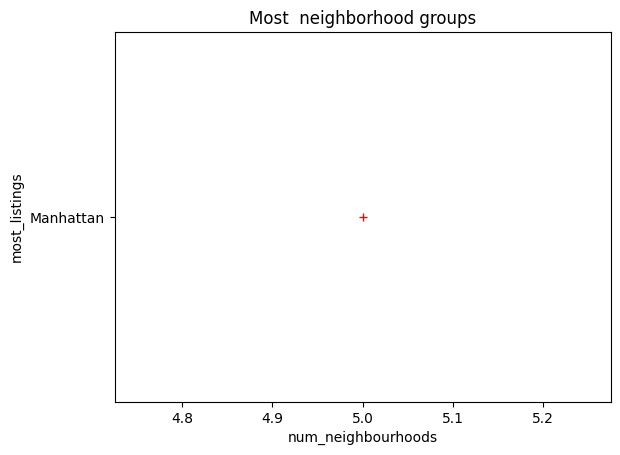

In [30]:
# How many neighborhood groups are available and which shows up the most?
neighbourhood_counts = air_bnb['neighbourhood_group'].value_counts()
print(neighbourhood_counts)
num_neighbourhoods = air_bnb['neighbourhood_group'].nunique()
most_listings = air_bnb['neighbourhood_group'].value_counts().idxmax()
print (f'The neighborhood groups available are {num_neighbourhoods}')
print(f'The group show the most is {most_listings}')
plt.plot(num_neighbourhoods ,most_listings, 'r+--' )
plt.xlabel('num_neighbourhoods')
plt.ylabel('most_listings')
plt.title('Most  neighborhood groups')
plt.show()





neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64


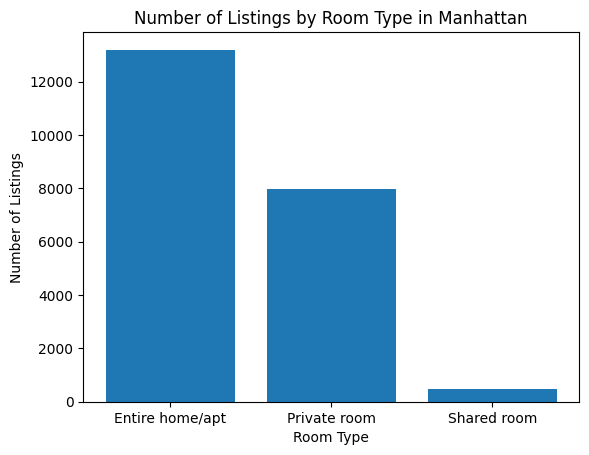

In [31]:
# Are private rooms the most popular in manhattan?

# Filter the data for Manhattan and group by room type
housing_popularity_manhattan = air_bnb.groupby('neighbourhood_group')['room_type'].value_counts()
print(housing_popularity_manhattan)
manhattan_data = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']
room_types = manhattan_data.groupby('room_type')['id'].count().reset_index()

# Plot a bar chart of the number of listings for each room type
plt.bar(room_types['room_type'], room_types['id'])
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Room Type in Manhattan')
plt.show()



In [57]:
air_bnb.dtypes
busiest_host = air_bnb.groupby('host_name').agg(last_review=('last_review',max), reviews_per_month=('reviews_per_month', 'mean'),number_of_reviews=('number_of_reviews','mean'))
sorted_host = busiest_host.sort_values(by=['last_review', 'reviews_per_month','number_of_reviews'], ascending=False)
print(sorted_host)






                last_review  reviews_per_month  number_of_reviews
host_name                                                        
Nalicia          2019-07-08          17.333333         348.666667
Tio              2019-07-08          10.000000          37.000000
Louann           2019-07-08           8.333333          50.666667
Rodolfo          2019-07-08           7.000000          95.000000
Joseph & Teresa  2019-07-08           7.000000          43.000000
...                     ...                ...                ...
Meka             2012-11-01           0.000000          68.000000
Vimal            2012-10-02           0.000000           1.000000
Glauce           2012-09-18           0.000000           1.000000
G & S            2012-08-22           0.000000          31.000000
Fredah           2011-09-19           0.000000           1.000000

[9885 rows x 3 columns]


"plt.bar(top_hosts['host_name'], top_hosts['number_of_reviews'])\nplt.xlabel('Host Name')\nplt.ylabel('Total Reviews')\nplt.title('Top 10 Hosts by Total Reviews')\n#plt.xticks(rotation=90)\nplt.xticks(fontsize = 10)\nplt.yticks(fontsize = 10)\nplt.show()"

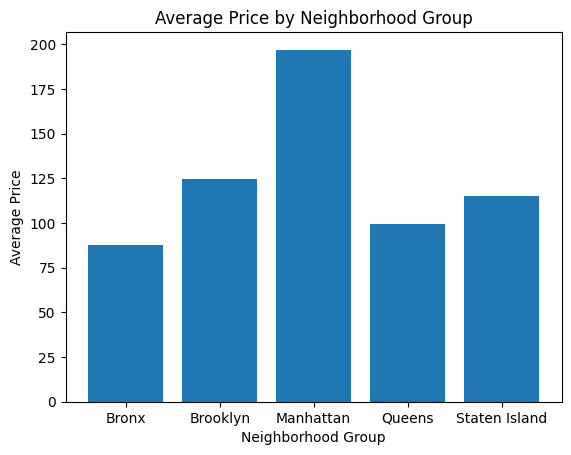

In [18]:
#Which neighorhood group has the highest average price?

avg_prices = air_bnb.groupby('neighbourhood_group')['price'].mean().reset_index()
highest_avg_price = avg_prices.sort_values(by='price', ascending=False).iloc[0]

plt.bar(avg_prices['neighbourhood_group'], avg_prices['price'])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood Group')
plt.show()


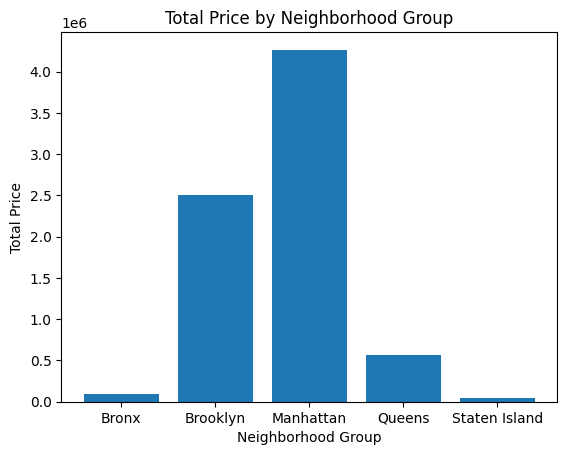

In [19]:
# Which neighbor hood group has the highest total price?

total_prices = air_bnb.groupby('neighbourhood_group')['price'].sum().reset_index()
highest_total_price = total_prices.sort_values(by='price', ascending=False).iloc[0]

plt.bar(total_prices['neighbourhood_group'], total_prices['price'])
plt.xlabel('Neighborhood Group')
plt.ylabel('Total Price')
plt.title('Total Price by Neighborhood Group')
plt.show()


In [60]:
#Which top 5 hosts have the highest total price?

highest_price_per_host = air_bnb.groupby('host_name').agg(price=('price', 'max'))
high_price_host_sorted = highest_price_per_host.sort_values(by=['price'], ascending=False)
print(high_price_host_sorted.head(15))



             price
host_name         
Kathrine     10000
Erin         10000
Olson         9999
Amy           9999
Rum           8500
Jessica       8000
Sandra        7500
Jay And Liz   6000
Debra         5100
Sarah-2       5000
Bianca        5000
Rasmus        5000
Sarah-B       5000
Lloyd         3900
Joseph        3800


106            Michael
59     Gurpreet  Singh
23               Brian
47      Emily And Joel
73       Jo & Savannah
            ...       
43               Ehren
42              Edward
41              Dragan
40                Doug
140                 正川
Name: host_name, Length: 141, dtype: object
106    5
59     4
23     3
47     2
73     2
      ..
43     1
42     1
41     1
40     1
140    1
Name: id, Length: 141, dtype: int64


C:\Users\swapn\AppData\Local\Temp\ipykernel_13144\1181450437.py:25: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  plt.tight_layout()
C:\Users\swapn\AppData\Local\Temp\ipykernel_13144\1181450437.py:25: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  plt.tight_layout()
C:\Users\swapn\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\swapn\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


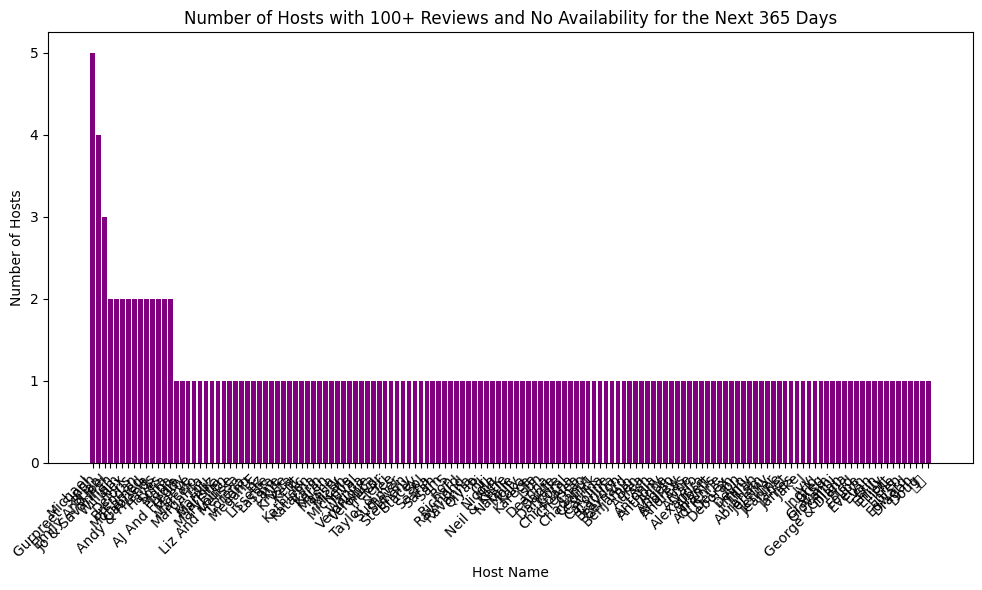

In [5]:
# Who currently has no (zero) availability with a review count of 100 or more?

import matplotlib.pyplot as plt

# Filter the data to get hosts with 100 or more reviews and no availability for the next 365 days
unavailable_hosts = air_bnb[(air_bnb['number_of_reviews'] >= 100) & (air_bnb['availability_365'] == 0)]
unavailable_hosts = unavailable_hosts.groupby('host_name')['id'].count().reset_index()

# Sort the data in descending order of number of unavailable hosts
unavailable_hosts = unavailable_hosts.sort_values(by='id', ascending=False)

# Get the number of unavailable hosts and their corresponding host names
host_names = unavailable_hosts['host_name']
num_unavailable = unavailable_hosts['id']
print(host_names)
print(num_unavailable )

# Create a bar plot of the number of hosts with 100 or more reviews and no availability for the next 365 days
plt.figure(figsize=(10,6))
plt.bar(host_names, num_unavailable, color='purple')
plt.title('Number of Hosts with 100+ Reviews and No Availability for the Next 365 Days')
plt.xlabel('Host Name')
plt.ylabel('Number of Hosts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()






                               max    sum
host_name   neighbourhood                
Kathrine    Astoria          10000  10000
Erin        Greenpoint       10000  10200
Olson       East Harlem       9999   9999
Amy         Lower East Side   9999  10359
Rum         Tribeca           8500   8500
Jessica     Clinton Hill      8000  15804
Sandra      East Flatbush     7500   7560
Jay And Liz Upper West Side   6000   6000
Debra       Midtown           5100   5100
Rasmus      Harlem            5000   7500


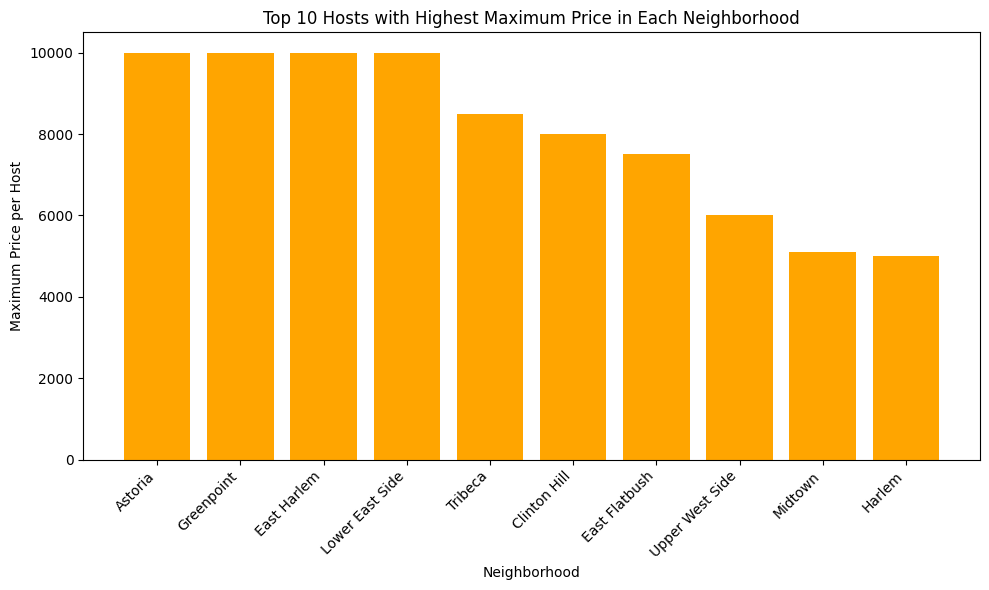

In [7]:
# What host has the highest total of prices and where are they located?

import matplotlib.pyplot as plt

# Group by host and neighborhood to find the max price per host in each neighborhood
highest_location_cost_per_host = air_bnb.groupby(['host_name', 'neighbourhood'])['price'].agg(['max', 'sum'])

# Sort the data in descending order of maximum price
tab_highest_cost_per_host_df = highest_location_cost_per_host.sort_values(by='max', ascending=False)

# Get the maximum price and corresponding neighborhood for the top 10 hosts
top_hosts = tab_highest_cost_per_host_df.head(10)
print(top_hosts)
max_prices = top_hosts['max']
neighborhoods = top_hosts.index.get_level_values('neighbourhood')

# Create a bar plot of the maximum price per host in each neighborhood
plt.figure(figsize=(10,6))
plt.bar(neighborhoods, max_prices, color='orange')
plt.title('Top 10 Hosts with Highest Maximum Price in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Maximum Price per Host')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [11]:
# When did Danielle from Queens last receive a review?

import pandas as pd
import matplotlib.pyplot as plt


# Filter the data to only include reviews by Danielle from Queens
air_bnb.dtypes
import matplotlib.pyplot as plt

host_danielle = air_bnb.groupby(['host_name','neighbourhood_group']).agg('last_review').max()
# host_danielle_sorted = host_danielle.sort_values('last_review', ascending=False)
host_danielle = host_danielle.loc['Danielle']
host_danielle









neighbourhood_group
Bronx       2018-03-27
Brooklyn    2019-07-06
Manhattan   2019-07-02
Queens      2019-07-08
Name: last_review, dtype: datetime64[ns]

## Further Questions

1. Which host has the most listings?

In [6]:
most_listings_host = air_bnb['host_id'].value_counts().idxmax()
print(air_bnb[air_bnb['host_id'] == most_listings_host]['host_name'].iloc[0])


Sonder (NYC)


2. How many listings have completely open availability?

In [10]:
year_round_avail = (air_bnb['availability_365'] == 365).sum()
year_round_avail

841

3. What room_types have the highest review numbers?

room_type
Entire home/apt    579856
Private room       537965
Shared room         19256
Name: number_of_reviews, dtype: int64


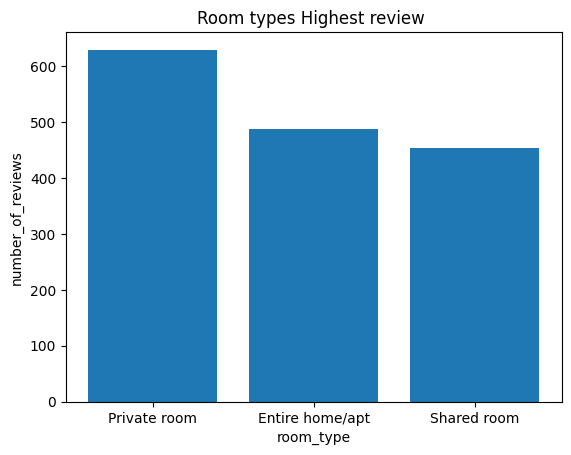

In [7]:
print(air_bnb.groupby('room_type')['number_of_reviews'].sum().nlargest())

plt.bar(air_bnb['room_type'], air_bnb['number_of_reviews'])
plt.xlabel('room_type')
plt.ylabel('number_of_reviews')
plt.title('Room types Highest review ')
plt.show()



# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

From the above analysis we conclude that:
.There are 5 neighbour hood groups are available and the group shows up the most is Manhattan.
.The  Entire home/apt is more popular in Manhattan as people may be preferring to travel with their famliy.
.Nalicia groups are the busiest based on their reviews.
.Manhattan group has the highest average prices.
.Manhattan group has the highest total prices.
.Below is the top hosts have the highest total price.
Kathrine     10000
Erin         10000
Olson         9999
Amy           9999
Rum           8500 

.Michael has no availability with a review count of 106.
.The top five hosts has the highest total of prices and they are located in:
.host_name   neighbourhood                
Kathrine    Astoria          10000  10000
Erin        Greenpoint       10000  10200
Olson       East Harlem       9999   9999
Amy         Lower East Side   9999  10359
Rum         Tribeca 

I got few answers : 
.Sonder (NYC) host has the most listing.
.841 hosts listing have completely open avilability.
.Entire home/apt  room_type has  the highest review numbers.





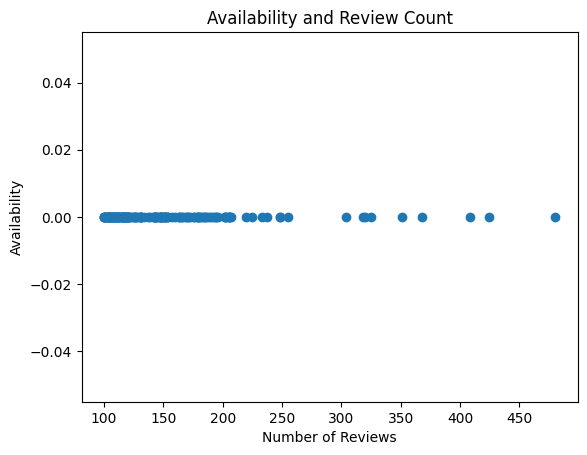

In [21]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter the data to only include listings with a review count of 100 or more
filtered_data = air_bnb[(air_bnb['number_of_reviews'] >= 100) & (air_bnb['availability_365'] == 0)]

# Create a scatter plot to show the relationship between review count and availability
plt.scatter(filtered_data['number_of_reviews'], filtered_data['availability_365'])

# Add labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Availability')
plt.title('Availability and Review Count')

# Show the plot
plt.show()
